In [41]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape, Point
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.wkt import loads
import statsmodels.api as sm
import urllib.request, json
import requests
import urllib.parse

import warnings
warnings.filterwarnings('ignore')

In [42]:
regressors = pd.read_csv('../Data/mergedregressors.csv')
regressors.head()

,NTAName,Population,Weighted Median Income,Total Population_x,Below Poverty Line %,Total Population_y,Less than 9th grade,"9th to 12th grade, no diploma",High school diploma,Some college,...,Total,"White, not hispanic","Black or African American, not hispanic","American Indian and Alaska Native, not hispanic","Asain, not hispanic","Native Hawaiian and Other Pacific Islander, not hispanic","Some other race alone, not hispanic","Two or More Races, not hispanic",Hispanic or Latino,NormalizedSD
0,Allerton,3117.473684,62141.291295,36057,24.602712,29883,209.785523,55.317248,41.823056,108.445040,...,62155,14.763092,38.169093,0.109404,4.709195,0.008044,0.933151,2.067412,39.240608,2.700146
1,Alley Pond Park,4118.636364,107518.289372,42,7.142857,39,0.000000,0.000000,0.000000,0.451722,...,90,65.555556,3.333333,0.000000,6.666667,0.000000,0.000000,0.000000,24.444444,1.627803
2,Annadale-Huguenot-Prince's Bay-Woodrow,5090.315789,126245.529571,44139,5.965246,35230,494.157303,62.471910,107.415730,240.299625,...,53872,72.772498,7.441714,0.252450,8.438521,0.000000,1.020939,1.522127,8.551752,0.235762
3,Arden Heights-Rossville,4266.533333,123022.836526,31583,4.344109,5547,36.519337,3.453039,4.640884,11.325967,...,30539,75.487082,0.533744,0.065490,7.881725,0.088412,0.160451,0.887390,14.895707,0.627650
4,Astoria (Central),3012.892857,99753.770961,47297,10.717382,46478,87.651438,9.122756,10.421836,34.068019,...,129518,48.189441,12.619868,0.175265,9.288284,0.006949,0.413842,2.672988,26.633364,2.017487


In [43]:
comp_sev = pd.read_csv('../Data/nta_complaint_severity_2019.csv',index_col = 0)
comp_sev.head()

,NTAName,avg_compound_score,norm_compound_score
0,Greenpoint,-0.341971,0.613614
1,Williamsburg,-0.295750,0.728616
2,South Williamsburg,-0.376319,0.528155
3,East Williamsburg,-0.340401,0.617522
4,Brooklyn Heights,-0.320416,0.667245


In [44]:
regressors.columns

Index(['NTAName', 'Population', 'Weighted Median Income', 'Total Population_x',
       'Below Poverty Line %', 'Total Population_y', 'Less than 9th grade',
       '9th to 12th grade, no diploma', 'High school diploma', 'Some college',
       'Associate degree', 'Bachelor degree', 'Graduate degree',
       'High school graduate, or higher', 'Bachelor degree, or higher',
       'Total', 'White, not hispanic',
       'Black or African American, not hispanic',
       'American Indian and Alaska Native, not hispanic',
       'Asain, not hispanic',
       'Native Hawaiian and Other Pacific Islander, not hispanic',
       'Some other race alone, not hispanic',
       'Two or More Races, not hispanic', 'Hispanic or Latino',
       'NormalizedSD'],
      dtype='object')

In [45]:
regressors = regressors[['NTAName', 'Population', 'Weighted Median Income',
                        'Below Poverty Line %','White, not hispanic',
                       'Black or African American, not hispanic',
                       'American Indian and Alaska Native, not hispanic',
                       'Asain, not hispanic',
                       'Native Hawaiian and Other Pacific Islander, not hispanic',
                       'Some other race alone, not hispanic',
                       'Two or More Races, not hispanic', 'Hispanic or Latino',
                       'NormalizedSD']]
regressors.head()

,NTAName,Population,Weighted Median Income,Below Poverty Line %,"White, not hispanic","Black or African American, not hispanic","American Indian and Alaska Native, not hispanic","Asain, not hispanic","Native Hawaiian and Other Pacific Islander, not hispanic","Some other race alone, not hispanic","Two or More Races, not hispanic",Hispanic or Latino,NormalizedSD
0,Allerton,3117.473684,62141.291295,24.602712,14.763092,38.169093,0.109404,4.709195,0.008044,0.933151,2.067412,39.240608,2.700146
1,Alley Pond Park,4118.636364,107518.289372,7.142857,65.555556,3.333333,0.000000,6.666667,0.000000,0.000000,0.000000,24.444444,1.627803
2,Annadale-Huguenot-Prince's Bay-Woodrow,5090.315789,126245.529571,5.965246,72.772498,7.441714,0.252450,8.438521,0.000000,1.020939,1.522127,8.551752,0.235762
3,Arden Heights-Rossville,4266.533333,123022.836526,4.344109,75.487082,0.533744,0.065490,7.881725,0.088412,0.160451,0.887390,14.895707,0.627650
4,Astoria (Central),3012.892857,99753.770961,10.717382,48.189441,12.619868,0.175265,9.288284,0.006949,0.413842,2.672988,26.633364,2.017487


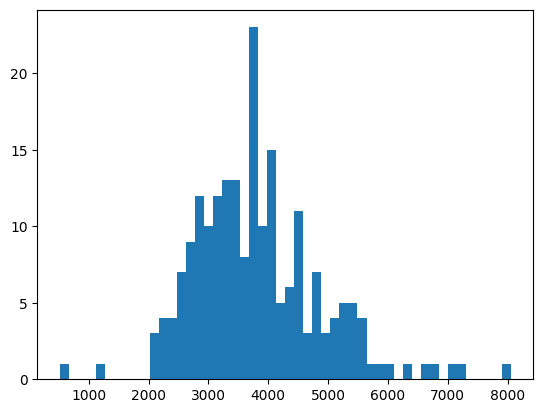

In [46]:
plt.hist(regressors['Population'],bins = 50)
plt.show()

In [47]:
regressors['Population'].min()

518.0

In [48]:
regressors.sort_values(by = 'Population').head(5)

,NTAName,Population,Weighted Median Income,Below Poverty Line %,"White, not hispanic","Black or African American, not hispanic","American Indian and Alaska Native, not hispanic","Asain, not hispanic","Native Hawaiian and Other Pacific Islander, not hispanic","Some other race alone, not hispanic","Two or More Races, not hispanic",Hispanic or Latino,NormalizedSD
9,Barren Island-Floyd Bennett Field,518.000000,126299.333333,0.0,61.538462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.461538,0.778138
98,Jacob Riis Park-Fort Tilden-Breezy Point Tip,1213.600000,182126.603329,0.0,1.513761,58.119266,0.000000,0.000000,0.000000,0.000000,0.000000,40.366972,0.808128
90,Highland Park-Cypress Hills Cemeteries (North),2035.937500,84556.085157,0.0,71.392547,3.054077,0.700476,7.032782,0.000000,2.101429,4.483048,11.235640,1.362227
72,Fort Hamilton,2169.285714,102059.791044,0.0,15.099470,19.364534,0.293402,19.407471,0.178904,7.406612,2.733648,35.515958,5.025712
92,Holy Cross Cemetery,2172.333333,75906.485346,0.0,0.000000,20.833333,0.000000,0.000000,0.000000,0.000000,0.000000,79.166667,9.946825


In [49]:
len(regressors)

207

In [50]:
from shapely import wkt

nta_shp = pd.read_csv('../Data/2020NTA.csv')
nta_shp['geometry'] = nta_shp['geometry'].apply(wkt.loads)
nta_shp = gpd.GeoDataFrame(nta_shp,geometry = 'geometry',crs = '4326')
nta_shp.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTA2020,NTAName,NTAAbbrev,NTAType,CDTA2020,CDTAName,Shape__Area,Shape__Length,geometry
0,1,3,Brooklyn,47,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),3.532179e+07,28914.131640,"POLYGON ((-73.93214 40.72817, -73.93238 40.728..."
1,2,3,Brooklyn,47,BK0102,Williamsburg,Wllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),2.886214e+07,28158.316197,"POLYGON ((-73.96176 40.72524, -73.96154 40.725..."
2,3,3,Brooklyn,47,BK0103,South Williamsburg,SWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),1.520896e+07,18250.280262,"POLYGON ((-73.95024 40.70548, -73.94984 40.705..."
3,4,3,Brooklyn,47,BK0104,East Williamsburg,EWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),5.226628e+07,43184.732279,"POLYGON ((-73.92406 40.71412, -73.92404 40.714..."
4,5,3,Brooklyn,47,BK0201,Brooklyn Heights,BkHts,0,BK02,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,9.982387e+06,14312.482065,"POLYGON ((-73.99237 40.68970, -73.99436 40.690..."


In [52]:
print(len(nta_shp))

262


In [59]:
nta_merge = nta_shp.merge(regressors,on = 'NTAName')
nta_merge.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTA2020,NTAName,NTAAbbrev,NTAType,CDTA2020,CDTAName,...,Below Poverty Line %,"White, not hispanic","Black or African American, not hispanic","American Indian and Alaska Native, not hispanic","Asain, not hispanic","Native Hawaiian and Other Pacific Islander, not hispanic","Some other race alone, not hispanic","Two or More Races, not hispanic",Hispanic or Latino,NormalizedSD
0,1,3,Brooklyn,47,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),...,9.311535,59.848188,2.151655,0.427585,10.766123,0.000000,0.627648,4.056174,22.122627,1.204309
1,2,3,Brooklyn,47,BK0102,Williamsburg,Wllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),...,15.759915,47.328406,2.397489,0.010604,9.308959,0.033932,0.311748,3.087788,37.521075,1.473846
2,3,3,Brooklyn,47,BK0103,South Williamsburg,SWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),...,50.337016,80.775030,2.757464,0.000000,2.525633,0.000000,0.211098,0.614445,13.116330,2.796927
3,4,3,Brooklyn,47,BK0104,East Williamsburg,EWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),...,25.362536,33.583738,8.739078,0.294903,20.134709,0.000000,0.327670,1.907767,35.012136,0.813877
4,5,3,Brooklyn,47,BK0201,Brooklyn Heights,BkHts,0,BK02,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,...,3.980947,58.102422,14.793880,0.235869,8.827029,0.046749,0.104122,3.918402,13.971526,4.261340


In [60]:
type(nta_merge)

geopandas.geodataframe.GeoDataFrame

In [61]:
len(nta_merge)

207

In [62]:
#add complaint severity metric
nta_merge = nta_merge.merge(comp_sev,on = 'NTAName')
print(type(nta_merge),len(nta_merge))

<class 'geopandas.geodataframe.GeoDataFrame'> 207


In [63]:
nta_merge.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTA2020,NTAName,NTAAbbrev,NTAType,CDTA2020,CDTAName,...,"Black or African American, not hispanic","American Indian and Alaska Native, not hispanic","Asain, not hispanic","Native Hawaiian and Other Pacific Islander, not hispanic","Some other race alone, not hispanic","Two or More Races, not hispanic",Hispanic or Latino,NormalizedSD,avg_compound_score,norm_compound_score
0,1,3,Brooklyn,47,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),...,2.151655,0.427585,10.766123,0.000000,0.627648,4.056174,22.122627,1.204309,-0.341971,0.613614
1,2,3,Brooklyn,47,BK0102,Williamsburg,Wllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),...,2.397489,0.010604,9.308959,0.033932,0.311748,3.087788,37.521075,1.473846,-0.295750,0.728616
2,3,3,Brooklyn,47,BK0103,South Williamsburg,SWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),...,2.757464,0.000000,2.525633,0.000000,0.211098,0.614445,13.116330,2.796927,-0.376319,0.528155
3,4,3,Brooklyn,47,BK0104,East Williamsburg,EWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),...,8.739078,0.294903,20.134709,0.000000,0.327670,1.907767,35.012136,0.813877,-0.340401,0.617522
4,5,3,Brooklyn,47,BK0201,Brooklyn Heights,BkHts,0,BK02,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,...,14.793880,0.235869,8.827029,0.046749,0.104122,3.918402,13.971526,4.261340,-0.320416,0.667245


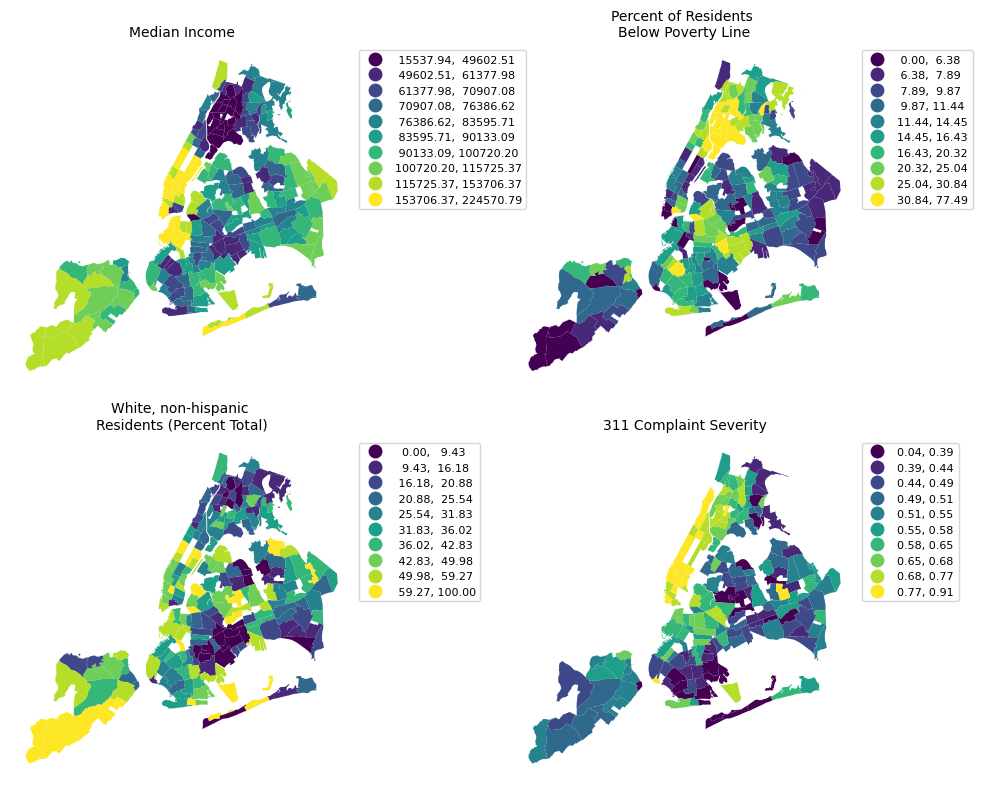

In [74]:
cols = ['Weighted Median Income','Below Poverty Line %','White, not hispanic','norm_compound_score']
titles = ['Median Income','Percent of Residents \nBelow Poverty Line',
          'White, non-hispanic \nResidents (Percent Total)','311 Complaint Severity']
fig, ax = plt.subplots(2,2,figsize = (10,8))
ax = ax.flatten()
for i,col in enumerate(cols):
    nta_merge.plot(column = col,ax = ax[i],legend=True,k = 10, scheme = 'Quantiles'
                  ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left','fontsize':8})
    ax[i].axis('off')
    ax[i].set_title(titles[i],fontsize = 10)
    i += 1
fig.tight_layout()
plt.savefig('../Outputs/regressors_compserv_spatial_graphs.png', bbox_inches='tight')
plt.show()